<a href="https://colab.research.google.com/github/raflysyauqi25/pemrograman_python_1101184105/blob/main/PYTHON14_M_RaflySyauqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MUHAMMAD RAFLY SYAUQI

1101184105

PYTHON MINGGU 14



In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [39]:
#FUNGSI DAYA TERIMA
def Prx(ptx,pl,gtx,grx):
 prx=10**(((10*(np.log10(ptx*1000))) - pl + gtx + grx)/10)
 return prx

In [40]:
#FUNGSI SNR
def snr(prx,bw):

  No = -174 + 10*(np.log10(bw))
  Sn = prx / (10**(No/10))

  return Sn

In [41]:
def KapasitasSel(SNR,BW):
  ks= BW*np.log2(1+SNR)
  return ks

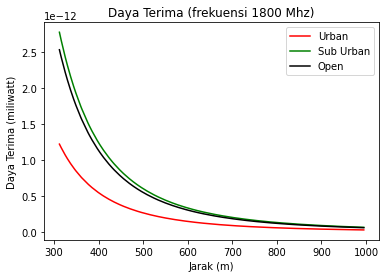

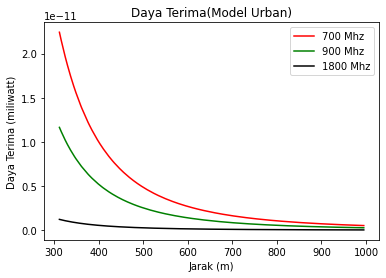

In [42]:
f=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

f=1800 #MHz
loc1='suburban'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

f=1800 #MHz
loc2='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)


LpUrban=cos(f,loc,tower,user,d)
LpSubUrban=cos(f,loc1,tower,user,d)
LpOpen=cos(f,loc2,tower,user,d)


PRXURBAN= Prx(30,LpUrban,10,2)
PRXSUBURBAN= Prx(30,LpSubUrban,10,2)
PRXOPEN = Prx(30,LpOpen,10,2)

#sorting
d_sort=d[np.argsort(d)]
Urban_sort=PRXURBAN[np.argsort(d)]
SubUrban_sort=PRXSUBURBAN[np.argsort(d)]
Open_sort=PRXOPEN[np.argsort(d)]

plt.figure()
plt.plot(d_sort,Urban_sort,'r',label='Urban' )
plt.plot(d_sort,SubUrban_sort,'g',label='Sub Urban' )
plt.plot(d_sort,Open_sort,'k', label='Open')
plt.legend()
plt.title('Daya Terima (frekuensi 1800 Mhz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliwatt)')
plt.show()


f1=700 #Mhz
f2=900 #Mhz
f3=1800 #MHz
loc3='urban'
tower=80 #m
user=1.5 #m
dmin=300#m
dmax=1000 #m
N=200 #titik


LpUrban1=cos(f1,loc3,tower,user,d)
LpUrban2=cos(f2,loc3,tower,user,d)
LpUrban3=cos(f3,loc3,tower,user,d)

PRXURB1= Prx(30,LpUrban1,10,2)
PRXURB2= Prx(30,LpUrban2,10,2)
PRXURB3= Prx(30,LpUrban3,10,2)

#sorting
d_sort=d[np.argsort(d)]
Urban_sort1=PRXURB1[np.argsort(d)]
Urban_sort2=PRXURB2[np.argsort(d)]
Urban_sort3=PRXURB3[np.argsort(d)]

plt.figure()
plt.plot(d_sort,Urban_sort1,'r',label='700 Mhz' )
plt.plot(d_sort,Urban_sort2,'g',label='900 Mhz')
plt.plot(d_sort,Urban_sort3,'k', label='1800 Mhz')
plt.legend()
plt.title('Daya Terima(Model Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliwatt)')
plt.show()

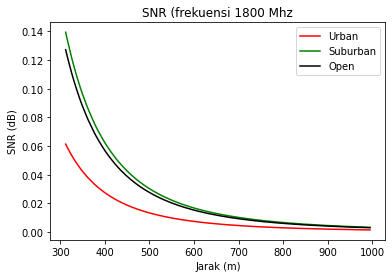

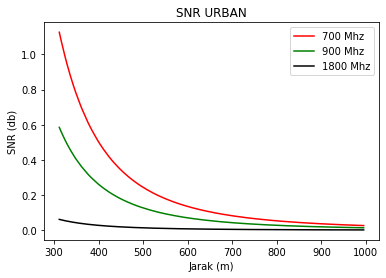

In [43]:
#snr
SNRURBAN=snr(Urban_sort,5000000) #(dayaterima(numerik),bandwidth(Hz))
SNROPEN=snr(Open_sort,5000000)
SNRSUBURBAN=snr(SubUrban_sort,5000000)

plt.figure()
plt.plot(d_sort,SNRURBAN,'r',label='Urban' )
plt.plot(d_sort,SNRSUBURBAN,'g',label='Suburban')
plt.plot(d_sort,SNROPEN,'k', label='Open')
plt.legend()
plt.title('SNR (frekuensi 1800 Mhz')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()


SNRURBAN1=snr(Urban_sort1,5000000)
SNRURBAN2=snr(Urban_sort2,5000000)
SNRURBAN3=snr(Urban_sort3,5000000)

plt.figure()
plt.plot(d_sort,SNRURBAN1,'r',label='700 Mhz' )
plt.plot(d_sort,SNRURBAN2,'g',label='900 Mhz')
plt.plot(d_sort,SNRURBAN3,'k', label='1800 Mhz')
plt.legend()
plt.title('SNR URBAN')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (db)')
plt.show()


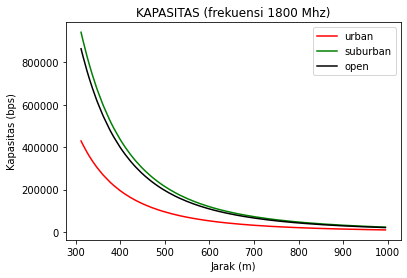

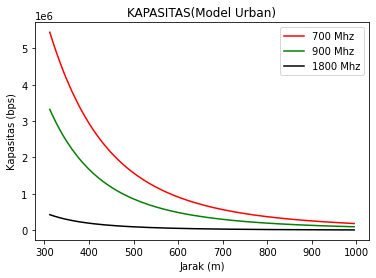

In [44]:
KapSelUrban = KapasitasSel (SNRURBAN,5000000)
KapSelSubUrban = KapasitasSel (SNRSUBURBAN,5000000)
KapSelOpen = KapasitasSel (SNROPEN,5000000)

plt.figure()
plt.plot(d_sort,KapSelUrban,'r',label='urban' )
plt.plot(d_sort,KapSelSubUrban,'g',label='suburban')
plt.plot(d_sort,KapSelOpen,'k', label='open')
plt.legend()
plt.title('KAPASITAS (frekuensi 1800 Mhz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()


KapSelUrban1 = KapasitasSel (SNRURBAN1,5000000)
KapSelUrban2 = KapasitasSel (SNRURBAN2,5000000)
KapSelUrban3 = KapasitasSel (SNRURBAN3,5000000)

plt.figure()
plt.plot(d_sort,KapSelUrban1,'r',label='700 Mhz' )
plt.plot(d_sort,KapSelUrban2,'g',label='900 Mhz')
plt.plot(d_sort,KapSelUrban3,'k', label='1800 Mhz')
plt.legend()
plt.title('KAPASITAS(Model Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()